In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
%matplotlib inline
import numpy as np
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accessing the dataset and naming col1, col2 and col3 as area, noofbed and price respectively.

In [24]:
data = pd.read_csv('/content/drive/MyDrive/MLcourse/ai project 1/ex1data2.txt', sep = ',', names = ['area', 'noofbed','price'])

In [25]:
data.head()

area  noofbed   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900

Description of *dataset*

In [26]:
data.describe()


area    noofbed          price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   area     47 non-null     int64
 1   noofbed  47 non-null     int64
 2   price    47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In this case, area and number of bedroom are *independent* variables so they are assigned as x. Price is *dependent* variable so it is assigned as y

In [33]:
x = data[['area', 'noofbed']]
y = data['price']

In [34]:
x.shape

(47, 2)

In [36]:
y.shape

(47,)

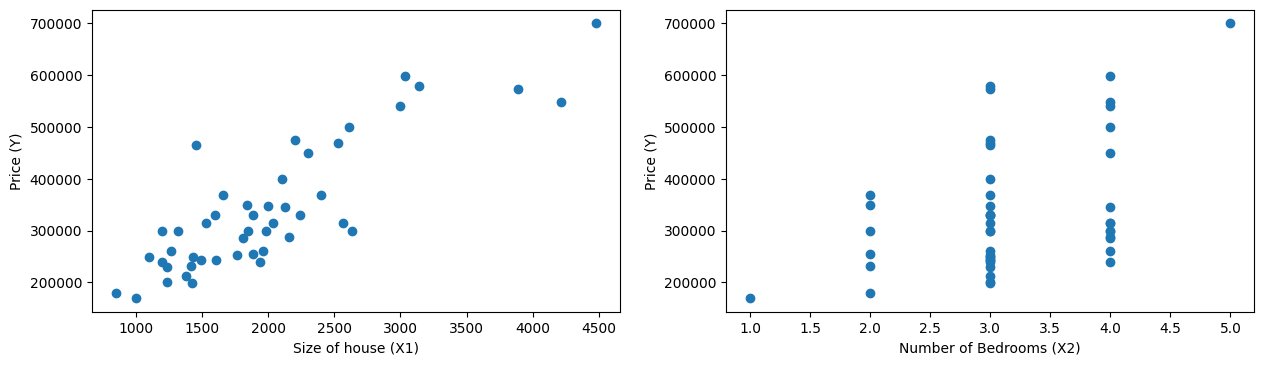

In [38]:
# Plotting example dataset
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(data['area'],y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(data['noofbed'],y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")
plt.show()

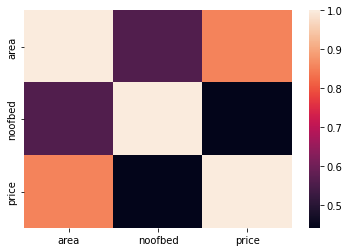

In [42]:
# Using Seaborn to get the heatmap
sns.heatmap(data.corr())

This heatmap provides us with a better insight about the *dataset*. Correlation between price and area is approximately 0.9, which means that they are highly correlated. So price mainly sepends on the size of the house. Number of bed and area is moderately correlated (approximately 0.6). Number of bed and price is least correlated. This could be because that there is a chance that one house has 4 bedrooms but the area of the house is still small, so the price is low for that house. 

In [45]:
# Building regression model
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [48]:
print ('Intercept:', regr.intercept_)
print ('Coefficient', regr.coef_)

Intercept: 89597.90954279754
Coefficient [  139.21067402 -8738.01911233]


This output includes the intercept and coefficients. We can use this information to build the multiple linear regression equation as follows:
Price = (Intercept) + (Area coef)*X1 + (Noofbed coef)*X2

In [52]:
# prediction of house selling price with sklearn
area = 2075
noofbed = 4
print ('Predicted House Price: \n', regr.predict([[area, noofbed]]))

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Predicted House Price: 
 [343507.98168006]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           2.43e-13
Time:                        23:43:15   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


So the house owner can let this model know the area and number of bedrooms in the house and it will predict the selling price of the house.

The different attributes of the regression model also can be observed.